## Census Data Processing

Every ten years, the United Kingdom undertakes a census of the population, with the most recent one having been conducted in 2021. The purpose of such a census is to compare different people across the nation and to provide the government with accurate statistics of the population to enable better planning, to develop policies, and to allocate certain funding. In this project, we are provided with a mock census of an imaginary modest town. We are making some decisions on what to do with an unoccupied plot of land and what to invest in.

To address these questions, I will need to clean and analyse the mock census data provided as follows:

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
census = pd.read_csv("census02.csv")
census.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Kaur Drive,Douglas,Adams,77.0,Head,Widowed,Male,Retired Museum education officer,None,Christian
1,2,Kaur Drive,Hollie,West,79.0,Head,Single,Female,Retired Dealer,None,Christian
2,3,Kaur Drive,Joseph,Hall,55.0,Head,Single,Male,Fast food restaurant manager,None,Christian
3,4,Kaur Drive,Gregory,Cox,35.0,Head,Single,Male,Housing manager/officer,None,None
4,5,Kaur Drive,Lydia,Jones,42.0,Head,Single,Female,Unemployed,None,Catholic


In [3]:
census.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10118 entries, 0 to 10117
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   10118 non-null  int64  
 1   Street                         10118 non-null  object 
 2   First Name                     10118 non-null  object 
 3   Surname                        10118 non-null  object 
 4   Age                            10118 non-null  float64
 5   Relationship to Head of House  10118 non-null  object 
 6   Marital Status                 7634 non-null   object 
 7   Gender                         10118 non-null  object 
 8   Occupation                     10118 non-null  object 
 9   Infirmity                      10118 non-null  object 
 10  Religion                       7577 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 869.6+ KB


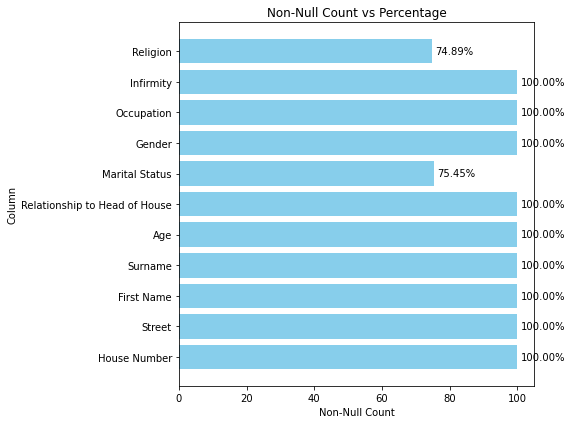

In [4]:
non_null_counts = census.notnull().sum()

# Calculate percentages of non-null values for each column
non_null_percentages = (non_null_counts / len(census)) * 100

# Plotting the non-null counts and displaying percentages as annotations
fig1, ax1 = plt.subplots(figsize=(8, 6))

bars = ax1.barh(non_null_counts.index, non_null_percentages, color='skyblue')

# Display percentages as annotations beside the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
             f'{non_null_percentages[i]:.2f}%', va='center')

# Set labels and title
ax1.set_xlabel('Non-Null Count')
ax1.set_ylabel('Column')
ax1.set_title('Non-Null Count vs Percentage')

fig1.tight_layout()
plt.show()

In [5]:
empty_string_mask = (census == ' ').sum()
empty_string_mask

House Number                      0
Street                            0
First Name                        0
Surname                           3
Age                               0
Relationship to Head of House     2
Marital Status                    1
Gender                            1
Occupation                        0
Infirmity                        10
Religion                          2
dtype: int64

In [6]:
unique_dwelling = census [(census ['House Number'] == 1)]
unique_dwelling_counts = unique_dwelling.shape[0]
print (f'the counts of population with unique dwelling: {unique_dwelling_counts}')
unique_dwelling

the counts of population with unique dwelling: 356


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Kaur Drive,Douglas,Adams,77.0,Head,Widowed,Male,Retired Museum education officer,None,Christian
23,1,Lime Road,Adam,Hayes,37.0,Head,Divorced,Male,Advice worker,None,None
47,1,Moore Crescent,Ruth,Gough,29.0,Head,Divorced,Female,"Surveyor, rural practice",None,None
48,1,Moore Crescent,Samuel,Baxter,49.0,Visitor,Single,Male,Colour technologist,None,None
49,1,Moore Crescent,Georgia,West,58.0,Lodger,Single,Female,"Pilot, airline",None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
10113,1,St.John Haven,Patrick,Morgan,9.0,Son,NaN,Male,Student,None,NaN
10114,1,St.John Haven,Caroline,Morgan,6.0,Daughter,NaN,Female,Student,None,NaN
10115,1,St.John Haven,Benjamin,Morgan,2.0,Son,NaN,Male,Child,None,NaN
10116,1,St.John Haven,Kate,Whitehead,51.0,Sibling,Single,Female,Food technologist,None,Christian


### Data Cleaning

###### To get a better view of address, we concatenate the house number and street column to get an Address column

In [7]:
# Concatenate the house number and street columns with a space separator
census['Address'] = census ['House Number'].astype(str) + ' ' + census['Street']
census.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address
0,1,Kaur Drive,Douglas,Adams,77.0,Head,Widowed,Male,Retired Museum education officer,None,Christian,1 Kaur Drive
1,2,Kaur Drive,Hollie,West,79.0,Head,Single,Female,Retired Dealer,None,Christian,2 Kaur Drive
2,3,Kaur Drive,Joseph,Hall,55.0,Head,Single,Male,Fast food restaurant manager,None,Christian,3 Kaur Drive
3,4,Kaur Drive,Gregory,Cox,35.0,Head,Single,Male,Housing manager/officer,None,None,4 Kaur Drive
4,5,Kaur Drive,Lydia,Jones,42.0,Head,Single,Female,Unemployed,None,Catholic,5 Kaur Drive


###### Number of occupants per address

In [8]:
# Group by 'Address' and count the occurrences, then transform to broadcast counts back to original DataFrame
census['Population_counts'] = census.groupby('Address')['Address'].transform('count')

census.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
0,1,Kaur Drive,Douglas,Adams,77.0,Head,Widowed,Male,Retired Museum education officer,None,Christian,1 Kaur Drive,1
1,2,Kaur Drive,Hollie,West,79.0,Head,Single,Female,Retired Dealer,None,Christian,2 Kaur Drive,1
2,3,Kaur Drive,Joseph,Hall,55.0,Head,Single,Male,Fast food restaurant manager,None,Christian,3 Kaur Drive,1
3,4,Kaur Drive,Gregory,Cox,35.0,Head,Single,Male,Housing manager/officer,None,None,4 Kaur Drive,1
4,5,Kaur Drive,Lydia,Jones,42.0,Head,Single,Female,Unemployed,None,Catholic,5 Kaur Drive,2


In [9]:
#Getting the occupants more than 5 in the same address and the address is not unique dwelling
filtered_population = census[(census['Population_counts'] > 5) & (census['House Number'] != 1)]
filtered_population_counts = filtered_population.shape[0]
print (f'The counts of population with occupants more than 5 in the same address and not unique dwelling: {filtered_population_counts}')
filtered_population

The counts of population with occupants more than 5 in the same address and not unique dwelling: 2151


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
276,9,Kraken Road,Maria,Smith,60.0,Head,Single,Female,"Nurse, mental health",None,Christian,9 Kraken Road,6
277,9,Kraken Road,Aaron,Roberts,40.0,None,Single,Male,Equities trader,None,Methodist,9 Kraken Road,6
278,9,Kraken Road,Henry,Parker,61.0,None,Single,Male,Sports coach,None,None,9 Kraken Road,6
279,9,Kraken Road,Claire,Clark,18.0,None,Single,Female,Student,None,NaN,9 Kraken Road,6
280,9,Kraken Road,Joanna,Sutton,27.0,None,Single,Female,Education administrator,None,Catholic,9 Kraken Road,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10000,2,Barker Lights,Edward,Smith,57.0,Husband,Married,Male,Clothing/textile technologist,None,None,2 Barker Lights,6
10001,2,Barker Lights,Dorothy,Smith,32.0,Daughter,Single,Female,"Engineer, agricultural",None,None,2 Barker Lights,6
10002,2,Barker Lights,Kirsty,Smith,25.0,Daughter,Single,Female,Unemployed,None,None,2 Barker Lights,6
10003,2,Barker Lights,Jacob,Smith,22.0,Son,Single,Male,University Student,None,None,2 Barker Lights,6


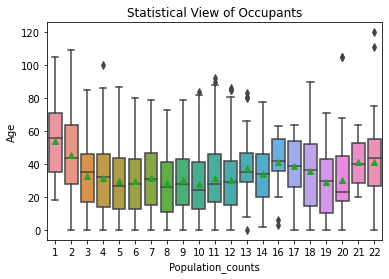

In [10]:
fig12, ax12 = plt.subplots()
sns.boxplot(data=census, x='Population_counts', y='Age', showmeans=True, ax=ax12)
ax12.set_xlabel('Population_counts')
ax12.set_title('Statistical View of Occupants')
plt.show()

In [11]:
census['Population_counts'].describe()

count    10118.000000
mean         5.063847
std          3.923565
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         22.000000
Name: Population_counts, dtype: float64

### Data Cleaning

##### Cleaning the surname column

In [12]:
surname_null = census [(census ['Surname'] == ' ')]
surname_null

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
1152,27,Whittaker Crescent,Harry,,26.0,Husband,Married,Male,Charity officer,None,None,27 Whittaker Crescent,3
4251,12,Clementine Forest,Lesley,,64.0,Wife,Married,Female,Forensic scientist,Deaf,Christian,12 Clementine Forest,6
8240,121,O'Connor Crossroad,Irene,,75.0,Daughter,Divorced,Female,Retired Magazine journalist,None,None,121 O'Connor Crossroad,22


In [13]:
# to get the details of other population with same address as those with empty surname entries

# Get unique addresses from the 'Surname' empty entries
addresses_with_surname_null = surname_null['Address'].unique()

# Filter the DataFrame for rows with addresses matching 'addresses_with_surname_null'
surname_same_address = census[census['Address'].isin(addresses_with_surname_null)]

surname_same_address_counts = surname_same_address.shape[0]
print (f'the counts of population that has same address with empty surname entries: {surname_same_address_counts}')
surname_same_address

the counts of population that has same address with empty surname entries: 31


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
1151,27,Whittaker Crescent,Jessica,Clark,24.0,Head,Married,Female,Dentist,None,None,27 Whittaker Crescent,3
1152,27,Whittaker Crescent,Harry,,26.0,Husband,Married,Male,Charity officer,None,None,27 Whittaker Crescent,3
1153,27,Whittaker Crescent,Damien,Khan-Clark,7.0,Son,NaN,Male,Student,None,NaN,27 Whittaker Crescent,3
4250,12,Clementine Forest,Anthony,Hill,69.0,Head,Married,Male,Retired Charity fundraiser,None,Christian,12 Clementine Forest,6
4251,12,Clementine Forest,Lesley,,64.0,Wife,Married,Female,Forensic scientist,Deaf,Christian,12 Clementine Forest,6
4252,12,Clementine Forest,Jake,Hill,38.0,Son,Single,Male,Seismic interpreter,None,None,12 Clementine Forest,6
4253,12,Clementine Forest,Samantha,Hill,34.0,Daughter,Single,Female,IT technical support officer,None,Christian,12 Clementine Forest,6
4254,12,Clementine Forest,Jill,Hill,32.0,Daughter,Single,Female,Industrial buyer,None,None,12 Clementine Forest,6
4255,12,Clementine Forest,Charlie,Hill,31.0,Son,Single,Male,Podiatrist,None,Christian,12 Clementine Forest,6
8237,121,O'Connor Crossroad,Marion,Lewis,111.0,Head,Married,Female,Retired Geophysicist/field seismologist,None,Muslim,121 O'Connor Crossroad,22


In [14]:
#we can deduce from the above the above that the three missing surnames are Clark, Hill and Lewis respectively.
#To assign the surname to those individuals

# Dictionary mapping addresses to specific surnames
specific_surnames = {
    '27 Whittaker Crescent': 'Clark',
    '12 Clementine Forest': 'Hill',
    '121 O\'Connor Crossroad': 'Lewis'
}

# Filter the DataFrame for rows with missing 'Surname' entries and addresses matching the specific addresses
missing_surname_entries = census[(census['Surname'].str.strip() == '') & (census['Address'].isin(specific_surnames.keys()))]

# Assign specific surnames based on addresses
for index, row in missing_surname_entries.iterrows():
    address = row['Address']
    census.at[index, 'Surname'] = specific_surnames[address]

# Verify the changes
specific_surname_entries = census[(census['Surname'].isin(specific_surnames.values())) & (census['Address'].isin(specific_surnames.keys()))]
specific_surname_entries

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
1151,27,Whittaker Crescent,Jessica,Clark,24.0,Head,Married,Female,Dentist,None,None,27 Whittaker Crescent,3
1152,27,Whittaker Crescent,Harry,Clark,26.0,Husband,Married,Male,Charity officer,None,None,27 Whittaker Crescent,3
4250,12,Clementine Forest,Anthony,Hill,69.0,Head,Married,Male,Retired Charity fundraiser,None,Christian,12 Clementine Forest,6
4251,12,Clementine Forest,Lesley,Hill,64.0,Wife,Married,Female,Forensic scientist,Deaf,Christian,12 Clementine Forest,6
4252,12,Clementine Forest,Jake,Hill,38.0,Son,Single,Male,Seismic interpreter,None,None,12 Clementine Forest,6
4253,12,Clementine Forest,Samantha,Hill,34.0,Daughter,Single,Female,IT technical support officer,None,Christian,12 Clementine Forest,6
4254,12,Clementine Forest,Jill,Hill,32.0,Daughter,Single,Female,Industrial buyer,None,None,12 Clementine Forest,6
4255,12,Clementine Forest,Charlie,Hill,31.0,Son,Single,Male,Podiatrist,None,Christian,12 Clementine Forest,6
8237,121,O'Connor Crossroad,Marion,Lewis,111.0,Head,Married,Female,Retired Geophysicist/field seismologist,None,Muslim,121 O'Connor Crossroad,22
8238,121,O'Connor Crossroad,Jordan,Lewis,120.0,Husband,Married,Male,Retired Early years teacher,None,Muslim,121 O'Connor Crossroad,22


###### Cleaning the age column

In [15]:
#change the data tpe to int

census ['Age'] = census ['Age'].astype(int)

In [16]:
#Getting population with age at 0
age_zero = census [census ['Age'] == 0.0 ]
age_zero_counts = age_zero.shape[0]
print (f'the counts of population with Age at Zero: {age_zero_counts}')
age_zero

the counts of population with Age at Zero: 110


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
33,7,Lime Road,Stephen,Jones,0,Grandson,NaN,Male,Child,None,NaN,7 Lime Road,2
227,25,Kennedy Avenue,Ronald,Coleman-Butler,0,Son,NaN,Male,Child,None,NaN,25 Kennedy Avenue,3
416,32,Arnold Springs,Keith,Jones,0,Son,NaN,Male,Child,Disabled,NaN,32 Arnold Springs,3
502,29,Kraken Drive,Emily,Coates,0,Daughter,NaN,Female,Child,,NaN,29 Kraken Drive,5
524,36,Kraken Drive,Olivia,Briggs,0,Daughter,NaN,Female,Child,None,NaN,36 Kraken Drive,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9471,5,Todd Trail,Emily,Roberts,0,Daughter,NaN,Female,Child,None,NaN,5 Todd Trail,3
9584,18,Estuary Roads,Vanessa,Patterson,0,Daughter,NaN,Female,Child,None,NaN,18 Estuary Roads,4
9894,6,Smith Mews,Frances,Richards,0,Daughter,NaN,Female,Child,None,NaN,6 Smith Mews,7
10047,1,Edwards Lighthouse,Amy,Perry,0,Daughter,NaN,Female,Child,None,NaN,1 Edwards Lighthouse,5


In [17]:
#Relating the age to relationship to head of house
unique_relationships = age_zero['Relationship to Head of House'].unique()
print(unique_relationships)

['Grandson' 'Son' 'Daughter' 'None' 'Step-Son']


In [18]:
# Get unique values in the 'Relationship to Head of House' column and their counts
unique_relationships_counts = age_zero['Relationship to Head of House'].value_counts()

# Print unique values and their counts
print(unique_relationships_counts)

Son         57
Daughter    49
None         2
Step-Son     1
Grandson     1
Name: Relationship to Head of House, dtype: int64


From the above extration, it can be inferred that the age with 0.00 are probably infants

https://doc.ukdataservice.ac.uk/doc/4375/mrdoc/pdf/guide.pdf

###### Cleaning the Relationship to head of house
Relationship to the “Head” of the household (anyone aged over 18 can be a “Head” – they are simply the person who had the responsibility to fill in the census details)

In [19]:
#Get the unique entry
census ['Relationship to Head of House'].unique()

array(['Head', 'Son', 'Granddaughter', 'Daughter', 'Husband', 'Wife',
       'Grandson', 'Visitor', 'Lodger', 'None', 'Partner', 'Adopted Son',
       'Step-Son', 'Step-Daughter', 'Sibling', 'Cousin', 'Nephew',
       'Adopted Daughter', 'Neice', 'Adopted Grandson', ' '], dtype=object)

In [20]:
#To get the details of entries as NONE in dataset
rel_head_none = census [(census ['Relationship to Head of House'] == 'None')]
rel_head_none_counts = rel_head_none.shape[0]
print (f'the counts of population with entry as NONE in Relationship to Head of House: {rel_head_none_counts}')
rel_head_none

the counts of population with entry as NONE in Relationship to Head of House: 762


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
71,9,Moore Crescent,Jake,Byrne,47,None,Single,Male,Unemployed,None,None,9 Moore Crescent,3
72,9,Moore Crescent,Dylan,Moore,58,None,Single,Male,Unemployed,None,None,9 Moore Crescent,3
144,37,Moore Crescent,Glen,Ward,20,None,Single,Male,University Student,None,None,37 Moore Crescent,2
183,6,Kennedy Avenue,Nicholas,Bell,18,None,Single,Male,University Student,None,Catholic,6 Kennedy Avenue,2
191,10,Kennedy Avenue,Dylan,Turner,21,None,Single,Male,University Student,None,None,10 Kennedy Avenue,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10084,1,Violet Ranch,Jenna,Jackson,41,None,Single,Female,"Engineer, mining",None,None,1 Violet Ranch,7
10091,1,Tiger Ranch,Marc,Lloyd,58,None,Single,Male,Personnel officer,None,Methodist,1 Tiger Ranch,5
10092,1,Tiger Ranch,Mohamed,May,61,None,Single,Male,Chartered legal executive (England and Wales),None,Christian,1 Tiger Ranch,5
10093,1,Tiger Ranch,Katy,Watkins,25,None,Single,Female,Unemployed,None,,1 Tiger Ranch,5


In [21]:
# Filter the DataFrame based on the Age greater than or equal to 18 and occupation is student
rel_head_above = census[(census['Age'] >= 18) & (census['Occupation'] == 'Student') & (census['Relationship to Head of House'] == 'None')]
rel_head_above_counts = rel_head_above.shape[0]
print (f'the counts of population with NONE entry and age above 18 on Relationship to Head of House: {rel_head_above_counts}')
rel_head_above

the counts of population with NONE entry and age above 18 on Relationship to Head of House: 10


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
279,9,Kraken Road,Claire,Clark,18,None,Single,Female,Student,None,NaN,9 Kraken Road,6
3226,14,Cancer Drive,Oliver,Carter,18,None,Single,Male,Student,None,NaN,14 Cancer Drive,4
6640,28,Coppercrack Crescent,Peter,Taylor,18,None,Single,Male,Student,None,NaN,28 Coppercrack Crescent,3
7743,47,O'Connor Crossroad,Mark,Perry,18,None,Single,Male,Student,None,NaN,47 O'Connor Crossroad,13
8213,115,O'Connor Crossroad,Tina,Barlow,18,None,Single,Female,Student,None,NaN,115 O'Connor Crossroad,5
8230,118,O'Connor Crossroad,Aimee,Bird,18,None,Single,Female,Student,None,NaN,118 O'Connor Crossroad,7
8935,17,Dawson Fords,Louis,Waters,18,None,Single,Male,Student,None,NaN,17 Dawson Fords,3
9045,14,Merlin Lane,Brett,O'Brien,18,None,Single,Male,Student,None,NaN,14 Merlin Lane,4
9816,20,Baker Throughway,Samantha,Wyatt,18,None,Single,Female,Student,None,NaN,20 Baker Throughway,3
10077,1,Wakefield Tower,Darren,Davies,18,None,Single,Male,Student,None,NaN,1 Wakefield Tower,8


In [22]:
# Set missing to Head for the above filtered rows
census.loc[(census['Age'] >= 18) & (census['Occupation'] == 'Student') & (census['Relationship to Head of House'] == 'None'), 'Relationship to Head of House'] = 'Head'

In [23]:
#Relationship to head of house with empty string
rel_head_null = census [(census ['Relationship to Head of House'] == ' ')]
rel_head_null_counts = rel_head_null.shape[0]
print (f'the counts of population with empty entry on Relationship to Head of House: {rel_head_null_counts}')
rel_head_null

the counts of population with empty entry on Relationship to Head of House: 2


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
6019,176,Atkins Road,Katie,Lewis-Jones,11,,NaN,Female,Student,None,NaN,176 Atkins Road,5
6495,39,Wilson Throughway,Scott,Martin,40,,Married,Male,"Designer, television/film set",None,None,39 Wilson Throughway,3


In [24]:
#Getting address with same filtered rows as above

rel_head_null = census [(census ['Relationship to Head of House'] == ' ')]
# We can connect the missig entries with entries of the same address
add_rel_head_null = rel_head_null['Address'].unique()

# Filter the DataFrame for rows with addresses matching 'addresses_with_zero_age'
null_head_same_address = census[census['Address'].isin(add_rel_head_null)]

null_head_same_address_counts = null_head_same_address.shape[0]
print (f'the counts of population that has same address with entries that has relationshio to a head of house as null: {null_head_same_address_counts}')

null_head_same_address

the counts of population that has same address with entries that has relationshio to a head of house as null: 8


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
6015,176,Atkins Road,Paige,Jones,56,Head,Married,Female,Radio producer,None,None,176 Atkins Road,5
6016,176,Atkins Road,Garry,Jones,57,Husband,Married,Male,Ergonomist,None,None,176 Atkins Road,5
6017,176,Atkins Road,Maria,Jones,16,Daughter,NaN,Female,Student,None,NaN,176 Atkins Road,5
6018,176,Atkins Road,Tom,Lewis-Jones,12,Son,NaN,Male,Student,None,NaN,176 Atkins Road,5
6019,176,Atkins Road,Katie,Lewis-Jones,11,,NaN,Female,Student,None,NaN,176 Atkins Road,5
6494,39,Wilson Throughway,Carol,Martin,38,Head,Married,Female,"Producer, radio",None,None,39 Wilson Throughway,3
6495,39,Wilson Throughway,Scott,Martin,40,,Married,Male,"Designer, television/film set",None,None,39 Wilson Throughway,3
6496,39,Wilson Throughway,Pamela,Martin,5,Daughter,NaN,Female,Student,None,NaN,39 Wilson Throughway,3


###### Upon examining the missing data, we've noticed they coincide with existing addresses in our records. This indicates that by using the available details like address and gender, we can logically guess what might be missing.

Considering the given gender and age details:

The first missing entry might be a "daughter." This assumption takes into account the current household composition and age range, which aligns with typical family setups.

The second missing entry could possibly be the "husband," assuming the other person at the same address is the "head" of the household, and they're likely married. This inference follows common family structures and marital connections.

In [25]:
empty_rel_head = {
    '176 Atkins Road': 'Daughter',
    '39 Wilson Throughway': 'Husband',
}

# Filter the DataFrame for rows with missing 'Surname' entries and addresses matching the specific addresses
missing_rel_head_entries = census[(census['Relationship to Head of House'].str.strip() == '') & (census['Address'].isin(empty_rel_head.keys()))]

# Assign specific surnames based on addresses
for index, row in missing_rel_head_entries.iterrows():
    address = row['Address']
    census.loc[index, 'Relationship to Head of House'] = empty_rel_head[address]

# Verify the changes
specific_missing_rel_head_entries = census[(census['Relationship to Head of House'].isin(empty_rel_head.values())) & (census['Address'].isin(empty_rel_head.keys()))]
specific_missing_rel_head_entries

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
6016,176,Atkins Road,Garry,Jones,57,Husband,Married,Male,Ergonomist,None,None,176 Atkins Road,5
6017,176,Atkins Road,Maria,Jones,16,Daughter,NaN,Female,Student,None,NaN,176 Atkins Road,5
6019,176,Atkins Road,Katie,Lewis-Jones,11,Daughter,NaN,Female,Student,None,NaN,176 Atkins Road,5
6495,39,Wilson Throughway,Scott,Martin,40,Husband,Married,Male,"Designer, television/film set",None,None,39 Wilson Throughway,3
6496,39,Wilson Throughway,Pamela,Martin,5,Daughter,NaN,Female,Student,None,NaN,39 Wilson Throughway,3


#### Cleaning the Marital Status

In [26]:
#Getting the unique entries
census ['Marital Status'].unique()

array(['Widowed', 'Single', nan, 'Married', 'Divorced', ' '], dtype=object)

In [27]:
#checking the count of null entry
census ['Marital Status'].isna().sum()

2484

In [28]:
#filtering the marital status based on age is less than 18
filt_mar_stat = census [(census ['Age'] < 18) & (census ['Marital Status'].isna())]
filt_mar_stat_counts = filt_mar_stat.shape[0]
print (f'The counts with null entries at age below 18years:\n {filt_mar_stat_counts} rows')
filt_mar_stat.head()

The counts with null entries at age below 18years:
 2484 rows


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
5,5,Kaur Drive,Francis,Jones,3,Son,NaN,Male,Child,None,NaN,5 Kaur Drive,2
7,6,Kaur Drive,Ruth,Godfrey,12,Granddaughter,NaN,Female,Student,None,NaN,6 Kaur Drive,2
11,9,Kaur Drive,Samantha,Sheppard-Dean,2,Daughter,NaN,Female,Child,None,NaN,9 Kaur Drive,2
14,11,Kaur Drive,Billy,Wilkinson,3,Son,NaN,Male,Child,None,NaN,11 Kaur Drive,3
15,11,Kaur Drive,Mathew,Wilkinson,1,Son,NaN,Male,Child,None,NaN,11 Kaur Drive,3


In [29]:
# Set missing Marital Status to 'N/A' for the filtered rows
census.loc[(census['Age'] < 18) & (census['Marital Status'].isnull()), 'Marital Status'] = 'N/A'

In [30]:
# checking for missing sting in marital status
mar_stat_none = census [(census ['Marital Status'] == ' ')]
mar_stat_none

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
1941,2,Williams View,Katie,Alexander,66,Head,,Female,Leisure centre manager,None,Methodist,2 Williams View,2


In [31]:
## connecting the missing entry with entries of the same address
mar_stat_none_add = census [(census ['Address'] == '2 Williams View')]
mar_stat_none_add

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
1941,2,Williams View,Katie,Alexander,66,Head,,Female,Leisure centre manager,None,Methodist,2 Williams View,2
1942,2,Williams View,Geoffrey,Alexander,64,Husband,Married,Male,"Therapist, sports",None,None,2 Williams View,2


###### I can infer that individuals residing at the same address and identified as having a relationship to the head of household are likely married. Therefore, we propose setting their marital status to 'Married' based on this correlation."

In [32]:
census.loc[(census['Address'] == '2 Williams View') & (census['Marital Status'] == ' '), 'Marital Status'] = 'Married'
updated_mar_stat = census[(census['Address'] == '2 Williams View') & (census['Marital Status'] == 'Married')]
updated_mar_stat

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
1941,2,Williams View,Katie,Alexander,66,Head,Married,Female,Leisure centre manager,None,Methodist,2 Williams View,2
1942,2,Williams View,Geoffrey,Alexander,64,Husband,Married,Male,"Therapist, sports",None,None,2 Williams View,2


###### Cleaning the Gender Column

In [33]:
# check to see the unique entry in Gender
census['Gender'].unique()

array(['Male', 'Female', ' '], dtype=object)

In [34]:
# checking for missing sting in Gender
gender_null = census [(census ['Gender'] == ' ')]
gender_null_counts = gender_null.shape[0]
print (f'the counts of population with empty entry on Gender: {gender_null_counts}')
gender_null

the counts of population with empty entry on Gender: 1


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
273,7,Kraken Road,Dale,Powell,79,Head,Married,,Retired TEFL teacher,None,None,7 Kraken Road,2


In [35]:
## connecting the missing entry with entries of the same address
gender_none_add = census [(census ['Address'] == '7 Kraken Road')]
gender_none_add

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
273,7,Kraken Road,Dale,Powell,79,Head,Married,,Retired TEFL teacher,None,None,7 Kraken Road,2
274,7,Kraken Road,Jessica,Powell,78,Wife,Married,Female,"Retired Journalist, newspaper",None,None,7 Kraken Road,2


###### since the population record is in 1881, the gender is Male and Female and from the above, the Marital status was married. We can infer the missing gender using the Address of the entity

In [36]:
census.loc[(census['Address'] == '7 Kraken Road') & (census['Gender'] == ' '), 'Gender'] = 'Male'
updated_gen = census[(census['Address'] == '2 Williams View') & (census['Marital Status'] == 'Married')]
updated_gen

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts
1941,2,Williams View,Katie,Alexander,66,Head,Married,Female,Leisure centre manager,None,Methodist,2 Williams View,2
1942,2,Williams View,Geoffrey,Alexander,64,Husband,Married,Male,"Therapist, sports",None,None,2 Williams View,2


##### Cleaning the Occupation Column

In [37]:
census['Occupation'].unique()

array(['Retired Museum education officer', 'Retired Dealer',
       'Fast food restaurant manager', ..., 'Retired Designer, furniture',
       'Retired Geophysical data processor',
       'Retired Conservator, furniture'], dtype=object)

###### Categorizing the Occupation status based on:

Child - child

Student (child) - Age is less than 16

Student - Occupation is student but age is more than 16

unmeployed - Age is more than 16 and unemployed

Retired - Age is 65 and above and occupation is unemployed or occupation is Retired

Else - Employed

In [38]:
def categorize_occupation(row):
    if row['Occupation'] == 'Child':
        return 'Child'
    elif row['Age'] < 16:
        return 'Student (child)'
    elif row['Age'] >= 16 and 'Student' in row['Occupation']:
        return 'Student'
    elif row['Occupation'] == 'Unemployed' and row['Age'] < 65:
        return 'Unemployed'
    elif row['Age'] >= 65 and (row['Occupation'] == 'Unemployed' or 'Retired' in row['Occupation']):
        return 'Retired'
    else:
        return 'Employed'

# Apply the function to create a new column 'Occupation_Status'
census['Occupation_Status'] = census.apply(categorize_occupation, axis=1)

# Count of occurrences of each occupation status
occupation_counts = census['Occupation_Status'].value_counts()
occupation_counts

Employed           5419
Student (child)    1595
Student            1115
Retired             831
Child               596
Unemployed          562
Name: Occupation_Status, dtype: int64

##### Cleaning the Infirmity column

In [39]:
# check to see the unique entry in infirmity
census['Infirmity'].unique()

array(['None', 'Disabled', 'Blind', 'Mental Disability', 'Deaf', ' ',
       'Physical Disability', 'Unknown Infection'], dtype=object)

In [40]:
census['Infirmity'].value_counts()

None                   10034
Physical Disability       19
Blind                     15
Deaf                      13
                          10
Unknown Infection         10
Disabled                  10
Mental Disability          7
Name: Infirmity, dtype: int64

In [41]:
# getting entries with missing string
infirmity_null = census [(census ['Infirmity'] == ' ')]
infirmity_null_counts = infirmity_null.shape[0]
print (f'the counts of population with empty entry on infirmity: {infirmity_null_counts}')
infirmity_null

the counts of population with empty entry on infirmity: 10


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts,Occupation_Status
502,29,Kraken Drive,Emily,Coates,0,Daughter,N/A,Female,Child,,NaN,29 Kraken Drive,5,Child
1046,39,Blake Villages,Donald,Miller,43,Husband,Married,Male,"Administrator, local government",,None,39 Blake Villages,3,Employed
1641,18,O'Connor Crescent,Nicola,Clark,40,Head,Married,Female,"Lecturer, further education",,None,18 O'Connor Crescent,5,Employed
2179,56,Summer Viaduct,Mathew,French,32,Head,Married,Male,Mechanical engineer,,None,56 Summer Viaduct,4,Employed
2453,20,Crown Branch,Lynn,Morgan,3,Daughter,N/A,Female,Child,,NaN,20 Crown Branch,8,Child
3249,6,Davey Underpass,Molly,Ward-Jones,6,Daughter,N/A,Female,Student,,NaN,6 Davey Underpass,2,Student (child)
4802,25,Rose Street,Rachael,Lewis,46,Wife,Married,Female,Marketing executive,,None,25 Rose Street,2,Employed
5418,76,Atkins Road,Pauline,Stone,46,Cousin,Single,Female,Electrical engineer,,Christian,76 Atkins Road,12,Employed
5900,156,Atkins Road,Liam,Roberts,21,Son,Single,Male,University Student,,None,156 Atkins Road,12,Student
9348,98,Iron Crescent,Ann,Walker,65,Head,Widowed,Female,"Designer, multimedia",,None,98 Iron Crescent,2,Employed


In [42]:
# Replace empty strings with 'Missing'
census['Infirmity'].replace(' ', 'Missing', inplace=True)
census['Infirmity'].value_counts()

None                   10034
Physical Disability       19
Blind                     15
Deaf                      13
Unknown Infection         10
Missing                   10
Disabled                  10
Mental Disability          7
Name: Infirmity, dtype: int64

#### Cleaning the religion column

In [43]:
census ['Religion'].unique()

array(['Christian', 'None', 'Catholic', nan, 'Methodist', 'Muslim',
       'Jewish', 'Sikh', 'Pagan', 'Agnostic', 'Bahai', 'Undecided', ' ',
       'Sith', 'Nope', 'Jedi'], dtype=object)

In [44]:
religion_counts = census['Religion'].value_counts()
religion_counts

None         3454
Christian    2135
Catholic     1093
Methodist     628
Muslim        142
Sikh           68
Jewish         47
                2
Agnostic        2
Pagan           1
Sith            1
Jedi            1
Nope            1
Bahai           1
Undecided       1
Name: Religion, dtype: int64

In [45]:
#using a placeholder for cell with funny entry and unknown religion
census['Religion'].replace (['Jedi', 'Nope', 'Agnostic', 'Undecided','Sith', 'Pagan'], 'Unknown', inplace = True)
census['Religion'].value_counts()

None         3454
Christian    2135
Catholic     1093
Methodist     628
Muslim        142
Sikh           68
Jewish         47
Unknown         7
                2
Bahai           1
Name: Religion, dtype: int64

In [46]:
# To check the null entry in religion column
rel_null = census [(census ['Religion'].isna())]
rel_null_counts = rel_null.shape[0]
print (f'the counts of population with null entry: {rel_null_counts}')
rel_null.head()

the counts of population with null entry: 2541


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts,Occupation_Status
5,5,Kaur Drive,Francis,Jones,3,Son,N/A,Male,Child,None,NaN,5 Kaur Drive,2,Child
7,6,Kaur Drive,Ruth,Godfrey,12,Granddaughter,N/A,Female,Student,None,NaN,6 Kaur Drive,2,Student (child)
11,9,Kaur Drive,Samantha,Sheppard-Dean,2,Daughter,N/A,Female,Child,None,NaN,9 Kaur Drive,2,Child
14,11,Kaur Drive,Billy,Wilkinson,3,Son,N/A,Male,Child,None,NaN,11 Kaur Drive,3,Child
15,11,Kaur Drive,Mathew,Wilkinson,1,Son,N/A,Male,Child,None,NaN,11 Kaur Drive,3,Child


In [47]:
# we have 2541 entries with as null. we filter the entry with legal age '18' to decide the right of religion

# filters the 'Religion' column based on the condition where the 'Age' is less than 18
filtered_age = census[(census['Age'] < 18) & (census['Religion'].isna())]
filtered_age.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts,Occupation_Status
5,5,Kaur Drive,Francis,Jones,3,Son,N/A,Male,Child,None,NaN,5 Kaur Drive,2,Child
7,6,Kaur Drive,Ruth,Godfrey,12,Granddaughter,N/A,Female,Student,None,NaN,6 Kaur Drive,2,Student (child)
11,9,Kaur Drive,Samantha,Sheppard-Dean,2,Daughter,N/A,Female,Child,None,NaN,9 Kaur Drive,2,Child
14,11,Kaur Drive,Billy,Wilkinson,3,Son,N/A,Male,Child,None,NaN,11 Kaur Drive,3,Child
15,11,Kaur Drive,Mathew,Wilkinson,1,Son,N/A,Male,Child,None,NaN,11 Kaur Drive,3,Child


In [48]:
# Fill NaN entries in 'Religion' column as 'N/A' for individuals with ages less than 18
census.loc[(census['Age'] < 18) & (census['Religion'].isnull()), 'Religion'] = 'N/A'

In [49]:
# To get the population above 18 and Religion is null
fil_age_above = census [(census ['Age'] >= 18) & (census ['Religion'].isna())]
fil_age_above_counts = fil_age_above.shape[0]
print (f'the row counts with null entry at age above 18years:\n {fil_age_above_counts} rows')
fil_age_above.head()

the row counts with null entry at age above 18years:
 56 rows


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts,Occupation_Status
180,5,Kennedy Avenue,Ashley,Berry,18,Head,Single,Male,Student,None,NaN,5 Kennedy Avenue,2,Student
279,9,Kraken Road,Claire,Clark,18,Head,Single,Female,Student,None,NaN,9 Kraken Road,6,Student
599,16,Holly Street,Vanessa,Roberts,20,None,Single,Female,University Student,None,NaN,16 Holly Street,2,Student
613,28,Holly Street,Tracy,Noble,23,Head,Single,Female,PhD Student,None,NaN,28 Holly Street,2,Student
638,46,Holly Street,Fiona,Parry,18,Head,Single,Female,Student,None,NaN,46 Holly Street,2,Student


In [50]:
# Set the NaN entries in 'Religion' column to 'missing' for individuals aged 18 or above
census.loc[(census['Age'] >= 18) & (census['Religion'].isna()), 'Religion'] = 'Missing'

In [51]:
#Religion with empty string
rel_empty = census[(census['Religion'] == ' ')]
rel_empty

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts,Occupation_Status
7599,23,O'Connor Crossroad,Maurice,O'Brien,42,Son,Single,Male,"Merchandiser, retail",None,,23 O'Connor Crossroad,5,Employed
10093,1,Tiger Ranch,Katy,Watkins,25,None,Single,Female,Unemployed,None,,1 Tiger Ranch,5,Unemployed


In [52]:
# Set the empty entries in 'Religion' column to 'Missing'
census.loc[census['Religion'] == ' ', 'Religion'] = 'Missing'

In [53]:
census['Religion'].value_counts()

None         3454
N/A          2485
Christian    2135
Catholic     1093
Methodist     628
Muslim        142
Sikh           68
Missing        58
Jewish         47
Unknown         7
Bahai           1
Name: Religion, dtype: int64

## Data Analysis and Visualization

#### Age Distribution

In [54]:
census['Age'].describe()

count    10118.000000
mean        35.162779
std         21.381825
min          0.000000
25%         18.000000
50%         34.000000
75%         50.000000
max        120.000000
Name: Age, dtype: float64

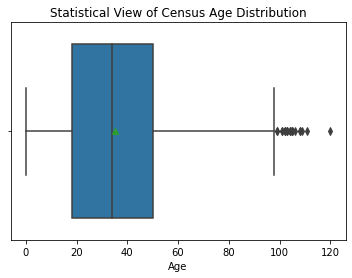

In [55]:
fig2, ax2 = plt.subplots()
sns.boxplot(data=census, x='Age', showmeans=True, ax=ax2)
ax2.set_xlabel('Age')
ax2.set_title('Statistical View of Census Age Distribution')
plt.show()

###### Age Pyramid

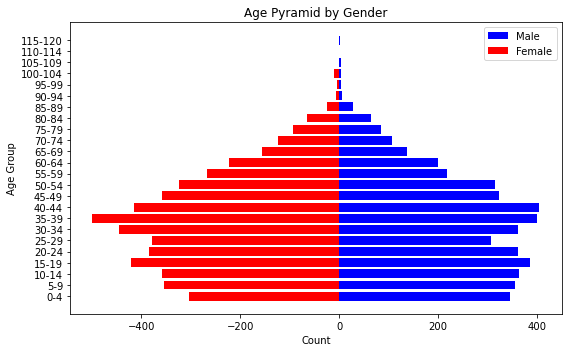

In [56]:
age_bins = [120, 115, 110, 105, 100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 0]
labels = ['115-120', '110-114', '105-109', '100-104', '95-99', '90-94', '85-89', '80-84', '75-79',
          '70-74', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39', '30-34', '25-29',
          '20-24', '15-19', '10-14', '5-9', '0-4']
# Categorize ages into age groups
census['AgeGroup'] = pd.cut(census['Age'], bins=age_bins[::-1], labels=labels[::-1])

# Create separate dataframes for males and females
male_df = census[census['Gender'] == 'Male']
female_df = census[census['Gender'] == 'Female']

# Calculate counts for each age group for males and females
male_counts = male_df['AgeGroup'].value_counts().sort_index(ascending=False)  # Sort in descending order
female_counts = female_df['AgeGroup'].value_counts().sort_index(ascending=False)  # Sort in descending order

# Plotting the age pyramid
fig3, ax3 = plt.subplots(figsize=(8, 5))

# Plotting males
ax3.barh(labels, male_counts, color='blue', label='Male')
ax3.barh(labels, -female_counts, color='red', label='Female')  # Use negative counts to plot bars in opposite direction

# Adding labels and title
ax3.set_xlabel('Count')
ax3.set_ylabel('Age Group')
ax3.set_title('Age Pyramid by Gender')
ax3.legend()

# Invert y-axis for an age pyramid view
ax3.invert_yaxis()
fig3.tight_layout()
plt.show()

In [57]:
# Count of occurrences of each occupation status
agegroup_counts = census['AgeGroup'].value_counts()
agegroup_counts

35-39      899
40-44      820
30-34      808
15-19      806
20-24      748
10-14      722
5-9        709
25-29      687
45-49      681
0-4        650
50-54      640
55-59      487
60-64      423
65-69      294
70-74      231
75-79      178
80-84      130
85-89       54
100-104     14
90-94       13
95-99        8
105-109      4
110-114      1
115-120      1
Name: AgeGroup, dtype: int64

#### Relationship to Head of House Demographics

In [58]:
# calculating the statistics for 'Age' based on 'Relationship to Head of House'
rel_head_stats = census.groupby('Relationship to Head of House')['Age'].describe()
rel_head_stats

,count,mean,std,min,25%,50%,75%,max
Relationship to Head of House,,,,,,,,
Adopted Daughter,20.0,12.150000,10.363270,1.0,4.50,9.0,17.50,33.0
Adopted Grandson,1.0,9.000000,NaN,9.0,9.00,9.0,9.00,9.0
Adopted Son,20.0,15.900000,11.040118,1.0,9.00,13.5,18.50,42.0
Cousin,40.0,43.125000,13.251391,19.0,31.00,47.0,54.25,62.0
Daughter,1790.0,17.022905,12.265738,0.0,7.00,15.0,24.00,75.0
Granddaughter,100.0,10.820000,6.117338,1.0,6.00,9.5,13.25,31.0
Grandson,97.0,10.783505,5.681158,0.0,7.00,11.0,14.00,27.0
Head,3168.0,48.821970,17.442690,17.0,36.00,46.0,61.00,111.0
Husband,1009.0,52.135778,15.829962,19.0,40.00,50.0,63.00,120.0


#### Marital status Demographics

In [59]:
#Geting the couns after cleaning
census['Marital Status'].value_counts()

Single      3737
Married     2674
N/A         2484
Divorced     871
Widowed      352
Name: Marital Status, dtype: int64

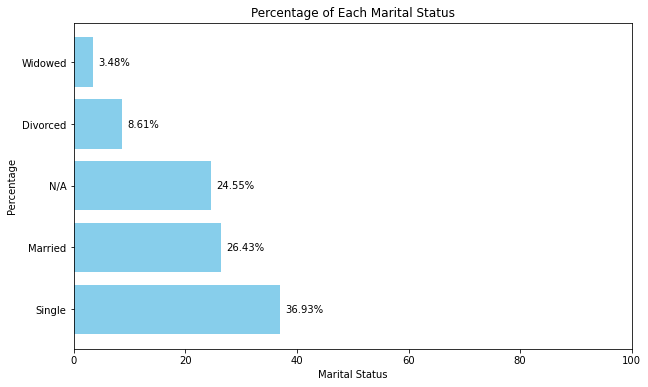

In [60]:
# Calculate the percentage of each unique entry in 'Marital Status'
marital_status_counts = census['Marital Status'].value_counts()
marital_status_percentages = (marital_status_counts / len(census['Marital Status'])) * 100

# Create a bar chart
fig4, ax4 = plt.subplots(figsize=(10, 6))

bars = ax4.barh(marital_status_counts.index, marital_status_percentages, color='skyblue')

# Display percentages as annotations beside the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
             f'{marital_status_percentages[i]:.2f}%', va='center')

# Add labels and title
ax4.set_xlabel('Marital Status')
ax4.set_ylabel('Percentage')
ax4.set_title('Percentage of Each Marital Status')
ax4.set_xlim(0, 100)  # Set x-axis limit to 0-100 for percentages
# Show the plot
plt.show()

Text(0.5, 1.0, 'Statistical View of Marital Status against Age Distribution')

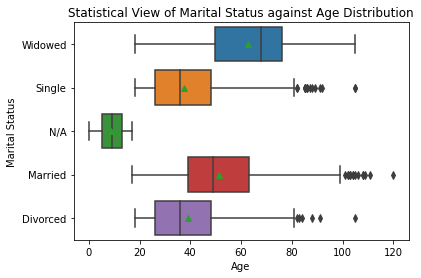

In [61]:
fig5, ax5 = plt.subplots()
sns.boxplot(data = census, x='Age', y = 'Marital Status', showmeans=True)
ax5.set_xlabel ('Age')
ax5.set_ylabel ('Marital Status')
ax5.set_title ('Statistical View of Marital Status against Age Distribution')

In [62]:
# Calculating the statistics for 'Age' based on 'Marital Status' and 'Gender'
divorced_stats = census [census ['Marital Status'] == 'Divorced'].groupby ('Gender')['Age'].describe()
divorced_stats

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,516.0,39.986434,16.329906,18.0,27.0,36.0,49.0,105.0
Male,355.0,37.611268,15.823207,18.0,25.0,35.0,46.0,84.0


In [63]:
married_stats = census [census ['Marital Status'] == 'Married'].groupby ('Gender')['Age'].describe()
married_stats

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,1341.0,50.407159,16.703644,17.0,38.0,48.0,62.0,111.0
Male,1333.0,52.458365,16.837479,18.0,40.0,50.0,64.0,120.0


#### Gender Demographics

In [64]:
# calculating the statistics for 'Age' based on 'Gender'
gender_status_stats = census.groupby('Gender')['Age'].describe()
gender_status_stats

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,5269.0,35.605618,21.106360,0.0,19.0,35.0,50.0,111.0
Male,4849.0,34.681584,21.669102,0.0,17.0,34.0,50.0,120.0


#### Occupation Demographics

In [65]:
employed_unique = census [census['Occupation_Status'] == 'Employed'] ['Occupation'].unique()
employed_unique

array(['Fast food restaurant manager', 'Housing manager/officer',
       'Therapist, occupational', 'Immunologist',
       'Occupational hygienist', 'Careers adviser',
       'Scientist, clinical (histocompatibility and immunogenetics)',
       'Psychologist, prison and probation services', 'Advice worker',
       'Hydrogeologist', 'Research scientist (maths)',
       'Market researcher',
       'Production designer, theatre/television/film', 'Buyer, retail',
       'Surgeon', 'Podiatrist', 'Surveyor, rural practice',
       'Colour technologist', 'Pilot, airline', 'Farm manager',
       'Hydrographic surveyor', 'Engineer, civil (consulting)',
       'Health service manager',
       'Armed forces logistics/support/administrative officer',
       'Camera operator', 'Product manager', 'Arts development officer',
       'Technical brewer', 'Designer, jewellery',
       'Designer, exhibition/display', 'Financial trader',
       'Horticultural consultant', 'Solicitor, Scotland', 'Best boy',

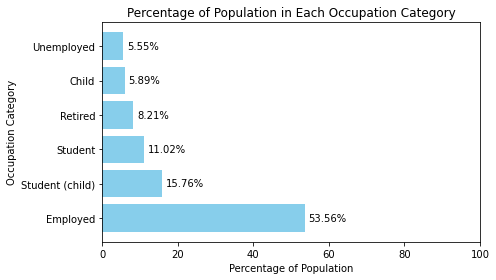

In [66]:
# Calculate percentages of each occupation status
occupation_percentages = (occupation_counts / census.shape[0] * 100).round(2)

# Create a DataFrame to hold counts and percentages:
occupation_summary = pd.DataFrame({'Count': occupation_counts, 'Percentage': occupation_percentages})

# Create the bar chart visualization
fig6, ax6 = plt.subplots(figsize=(7, 4))

# Plot the bars with percentages as annotations:
bars = plt.barh(occupation_summary.index, occupation_percentages, color='skyblue')  # Use barh for horizontal bars
for bar, percentage in zip(bars, occupation_percentages):
    ax6.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', va='center')  # Adjust text position

ax6.set_ylabel('Occupation Category')  # Set y-axis label
ax6.set_xlabel('Percentage of Population')  # Set x-axis label
ax6.set_title('Percentage of Population in Each Occupation Category')

ax6.set_xlim(0, 100)  # Set x-axis limit to 0-100 for percentages
fig6.tight_layout()  # Adjust layout for clear visuals
plt.show()

###### Unemployed/Employed distribtion

Text(0.5, 1.0, 'Statistical View of Occupation Categor against Age Distribution')

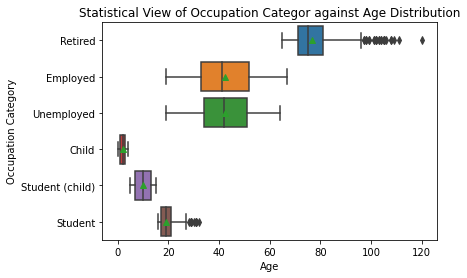

In [67]:
fig13, ax13 = plt.subplots()
sns.boxplot(data = census, x='Age', y = 'Occupation_Status', showmeans=True)
ax13.set_xlabel ('Age')
ax13.set_ylabel ('Occupation Category')
ax13.set_title ('Statistical View of Occupation Categor against Age Distribution')

In [68]:
employed_data = census[census['Occupation_Status'] == 'Employed']
employed_status_stats = employed_data.groupby('Gender')['Age'].describe()
employed_status_stats

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,2824.0,42.195467,11.998880,19.0,33.0,41.0,51.0,67.0
Male,2595.0,42.554143,12.016648,19.0,33.0,42.0,52.0,67.0


In [69]:
unemployed_data = census[census['Occupation_Status'] == 'Unemployed']

# Find the maxujnimum age among the employed individuals
max_age_unemployed = unemployed_data['Age'].max()
print(f"The maximum age among unemployed individuals is: {max_age_unemployed}")

The maximum age among unemployed individuals is: 64


In [70]:
# calculating the statistics for 'unemployed' based on 'Age'
unemployed_status_stats = unemployed_data['Age'].describe()
unemployed_status_stats

count    562.000000
mean      42.537367
std       10.960610
min       19.000000
25%       34.000000
50%       42.000000
75%       51.000000
max       64.000000
Name: Age, dtype: float64

In [71]:
# calculating the statistics for 'Age' based on 'Occupation_Status'
occupation_stats = census.groupby('Occupation_Status')['Age'].describe()
occupation_stats

,count,mean,std,min,25%,50%,75%,max
Occupation_Status,,,,,,,,
Child,596.0,2.092282,1.418915,0.0,1.0,2.0,3.0,4.0
Employed,5419.0,42.367226,12.007620,19.0,33.0,41.0,52.0,67.0
Retired,831.0,76.741276,7.982313,65.0,71.0,75.0,81.0,120.0
Student,1115.0,19.257399,2.374522,16.0,17.0,19.0,21.0,32.0
Student (child),1595.0,9.900940,3.185045,5.0,7.0,10.0,13.0,15.0
Unemployed,562.0,42.537367,10.960610,19.0,34.0,42.0,51.0,64.0


In [72]:
unemployed_status_stats = unemployed_data.groupby('Gender')['Age'].describe()
unemployed_status_stats

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,356.0,42.323034,10.588840,22.0,34.75,41.0,51.0,64.0
Male,206.0,42.907767,11.592102,19.0,34.00,42.5,52.0,64.0


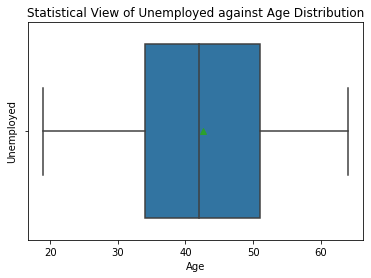

In [73]:
# Filter the data for unemployed individuals
unemployed_data = census[census['Occupation_Status'] == 'Unemployed']

# Create the boxplot
fig7, ax7 = plt.subplots()
sns.boxplot(data=unemployed_data, x='Age', showmeans=True, ax=ax7)

# Set labels and title
ax7.set_xlabel('Age')
ax7.set_ylabel('Unemployed')
ax7.set_title('Statistical View of Unemployed against Age Distribution')

plt.show()

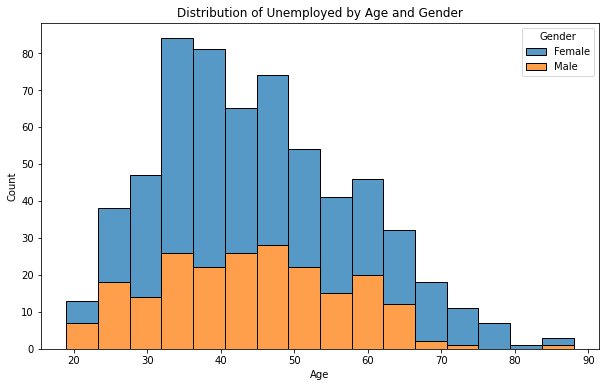

In [74]:
# Checking the unemployed distribution with age and gender
unemployed_data = census[census['Occupation'] == 'Unemployed']

# Plotting the distribution of 'Unemployed' individuals by 'Age' and 'Gender'
fig8, ax8 = plt.subplots(figsize=(10, 6))
sns.histplot(data=unemployed_data, x='Age', hue='Gender', multiple='stack', ax=ax8, legend=True)
ax8.set_title('Distribution of Unemployed by Age and Gender')
ax8.set_xlabel('Age')
ax8.set_ylabel('Count')
plt.show()

#### Infimity Demographics

In [75]:
# calculating the statistics for 'unemployed' based on 'Age'
infirmity_stats = census.groupby('Infirmity')['Age'].describe()
infirmity_stats

,count,mean,std,min,25%,50%,75%,max
Infirmity,,,,,,,,
Blind,15.0,33.333333,22.324447,2.0,14.50,34.0,45.50,77.0
Deaf,13.0,44.230769,25.606490,4.0,29.00,53.0,64.00,74.0
Disabled,10.0,33.400000,27.609177,0.0,15.25,26.0,55.50,77.0
Mental Disability,7.0,27.285714,32.386799,0.0,3.00,5.0,51.50,77.0
Missing,10.0,30.200000,21.846942,0.0,9.75,36.0,45.25,65.0
None,10034.0,35.148794,21.360963,0.0,18.00,34.0,50.00,120.0
Physical Disability,19.0,45.789474,20.759413,0.0,30.00,51.0,60.50,79.0
Unknown Infection,10.0,32.200000,18.949055,9.0,17.00,32.5,41.25,71.0


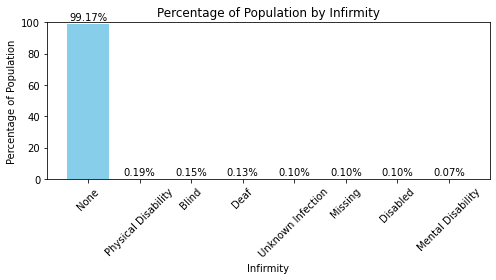

In [76]:
# Calculate religion percentages
infirmity_percentages = (census['Infirmity'].value_counts(normalize=True) * 100).round(2)

# Create a DataFrame with percentages
infirmity_details = pd.DataFrame({'Percentage': infirmity_percentages})

# Create the figure and axis
fig9, ax9 = plt.subplots(figsize=(7, 4))

# Plotting the percentage distribution of religions
bars = ax9.bar(infirmity_details.index, infirmity_percentages, color='skyblue')
for bar, percentage in zip(bars, infirmity_percentages):
    ax9.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.2f}%', ha='center', va='bottom')

ax9.set_title('Percentage of Population by Infirmity')
ax9.set_xlabel('Infirmity')
ax9.set_ylabel('Percentage of Population')
ax9.set_xticks(range(len(infirmity_details.index)))  # Set the tick positions
ax9.set_xticklabels(infirmity_details.index, rotation=45)  # Set the x-axis labels and rotate them
ax9.set_ylim(0, 100)

# Adjust layout of the figure
fig9.tight_layout()

plt.show()

### Religion Demographics

In [77]:
# calculating the statistics for 'Religion' based on 'Age'
religion_stats = census.groupby('Religion')['Age'].describe()
religion_stats

,count,mean,std,min,25%,50%,75%,max
Religion,,,,,,,,
Bahai,1.0,28.000000,NaN,28.0,28.00,28.0,28.00,28.0
Catholic,1093.0,43.184812,15.300730,18.0,33.00,42.0,50.00,104.0
Christian,2135.0,48.920843,18.016675,18.0,35.00,50.0,62.00,109.0
Jewish,47.0,43.957447,14.720523,18.0,33.00,42.0,52.00,77.0
Methodist,628.0,44.078025,16.946072,18.0,30.00,43.0,55.00,103.0
Missing,58.0,18.982759,3.425863,18.0,18.00,18.0,18.00,42.0
Muslim,142.0,38.105634,17.513402,18.0,27.00,33.0,44.00,120.0
N/A,2485.0,8.808048,5.059686,0.0,5.00,9.0,13.00,17.0
None,3454.0,41.473075,16.600892,18.0,29.00,39.0,51.00,108.0


In [78]:
# Calculating the statistics for 'Age' based on 'Religion' and 'Gender'
religion_stats = census.groupby(['Religion', 'Gender'])['Age'].describe()
religion_stats

count       mean        std   min    25%   50%    75%  \
Religion  Gender                                                           
Bahai     Female     1.0  28.000000        NaN  28.0  28.00  28.0  28.00   
Catholic  Female   612.0  42.500000  14.826161  18.0  33.00  41.0  49.00   
          Male     481.0  44.056133  15.856878  18.0  34.00  42.0  51.00   
Christian Female  1234.0  48.925446  17.585503  18.0  35.00  50.0  61.00   
          Male     901.0  48.914539  18.600849  18.0  34.00  50.0  62.00   
Jewish    Female    29.0  42.551724  13.886237  18.0  34.00  41.0  51.00   
          Male      18.0  46.222222  16.122894  19.0  33.25  45.0  59.75   
Methodist Female   340.0  44.850000  16.985275  18.0  31.00  44.0  56.00   
          Male     288.0  43.166667  16.883697  18.0  29.00  42.0  54.00   
Missing   Female    26.0  18.961538   1.731607  18.0  18.00  18.0  19.00   
          Male      32.0  19.000000   4.377361  18.0  18.00  18.0  18.00   
Muslim    Female    72.0  37.680556  16.685852  18.0  27.75  32.5  44.00   
          Male      70.0  38.542857  18.436484  19.0  26.00  33.0  47.50   
N/A       Female  1221.0   8.986896   5.046163   0.0   5.00   9.0  13.00   
          Male    1264.0   8.635285   5.068718   0.0   4.00   9.0  13.00   
None      Female  1691.0  40.771733  16.635954  18.0  28.00  37.0  50.00   
          Male    1763.0  42.145774  16.543986  18.0  29.00  40.0  52.00   
Sikh      Female    40.0  37.200000  17.801181  19.0  27.00  31.5  43.00   
          Male      28.0  33.464286  14.781074  19.0  24.00  30.0  36.25   
Unknown   Female     3.0  33.000000  16.370706  19.0  24.00  29.0  40.00   
          Male       4.0  45.750000   9.979145  31.0  44.50  49.5  50.75   

                    max  
Religion  Gender         
Bahai     Female   28.0  
Catholic  Female  104.0  
          Male     97.0  
Christian Female  105.0  
          Male    109.0  
Jewish    Female   77.0  
          Male     73.0  
Methodist Female  102.0  
          Male    103.0  
Missing   Female   25.0  
          Male     42.0  
Muslim    Female  111.0  
          Male    120.0  
N/A       Female   17.0  
          Male     17.0  
None      Female  105.0  
          Male    108.0  
Sikh      Female  105.0  
          Male     73.0  
Unknown   Female   51.0  
          Male     53.0

Text(0.5, 1.0, 'Statistical View of Religion against Age Distribution')

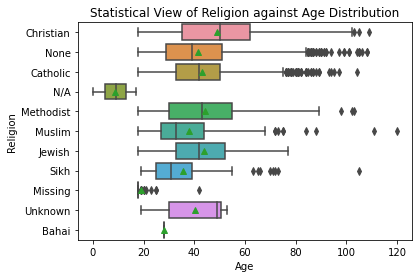

In [79]:
fig10, ax10 = plt.subplots()
sns.boxplot(data =census, x='Age', y = 'Religion', showmeans=True)
ax10.set_xlabel ('Age')
ax10.set_ylabel ('Religion')
ax10.set_title ('Statistical View of Religion against Age Distribution')

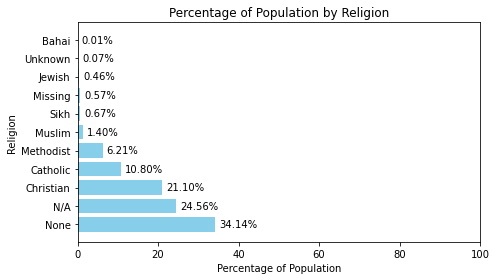

In [80]:
# Calculate religion percentages
religion_percentages = (census['Religion'].value_counts(normalize=True) * 100).round(2)

# Create a DataFrame with percentages
religion_details = pd.DataFrame({'Percentage': religion_percentages})

# Create the figure and axis
fig11, ax11 = plt.subplots(figsize=(7, 4))

# Plotting the percentage distribution of religions
bars = plt.barh(religion_details.index, religion_percentages, color='skyblue')  # Use barh for horizontal bars
for bar, percentage in zip(bars, religion_percentages):
    ax11.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', va='center')  # Adjust text position

    
ax11.set_ylabel('Religion') # Set y-axis label
ax11.set_xlabel('Percentage of Population')  # Set x-axis label
ax11.set_title('Percentage of Population by Religion')
ax11.set_xlim(0, 100)  # Set the x-axis limit to 0-100 for percentages

# Adjust layout of the figure
fig11.tight_layout()

plt.show()

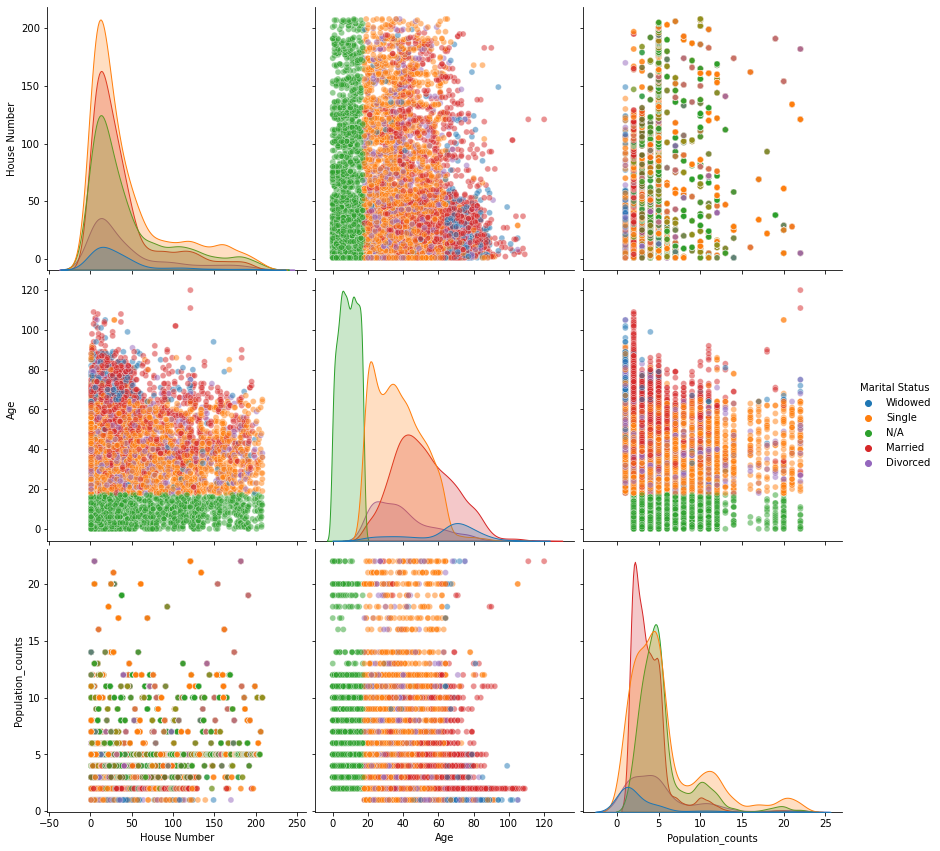

In [81]:
# Create pairplot with hue as 'Population_counts'
sns.pairplot(census, hue='Marital Status', plot_kws={'alpha': 0.5}, height=4)
plt.xlabel('Household Occupancy')
# Save the pairplot as an image
plt.savefig('pairplot_marital_status.png')
plt.show()

In [82]:
census.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10118 entries, 0 to 10117
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   10118 non-null  int64   
 1   Street                         10118 non-null  object  
 2   First Name                     10118 non-null  object  
 3   Surname                        10118 non-null  object  
 4   Age                            10118 non-null  int32   
 5   Relationship to Head of House  10118 non-null  object  
 6   Marital Status                 10118 non-null  object  
 7   Gender                         10118 non-null  object  
 8   Occupation                     10118 non-null  object  
 9   Infirmity                      10118 non-null  object  
 10  Religion                       10118 non-null  object  
 11  Address                        10118 non-null  object  
 12  Population_counts              1

In [83]:
census.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Population_counts,Occupation_Status,AgeGroup
0,1,Kaur Drive,Douglas,Adams,77,Head,Widowed,Male,Retired Museum education officer,None,Christian,1 Kaur Drive,1,Retired,75-79
1,2,Kaur Drive,Hollie,West,79,Head,Single,Female,Retired Dealer,None,Christian,2 Kaur Drive,1,Retired,75-79
2,3,Kaur Drive,Joseph,Hall,55,Head,Single,Male,Fast food restaurant manager,None,Christian,3 Kaur Drive,1,Employed,50-54
3,4,Kaur Drive,Gregory,Cox,35,Head,Single,Male,Housing manager/officer,None,None,4 Kaur Drive,1,Employed,30-34
4,5,Kaur Drive,Lydia,Jones,42,Head,Single,Female,Unemployed,None,Catholic,5 Kaur Drive,2,Unemployed,40-44


##### To save the pictures

In [84]:
import os
#a function to save the images
def save_image(fig, filename):
    if not os.path.exists("Data Viz"):
        os.makedirs("Data Viz")
    images_path = os.path.join("Data Viz", filename)
    fig.savefig(images_path)
 
# Save the images to the images folder
save_image(fig1, "Non_Null Count vs Percentage.png")
save_image(fig2, "Statistical View of Census Age Distribution.png")
save_image(fig3, "Age Pyramid by Gender.png")
save_image(fig4, "Percentage of Each Marital Status.png")
save_image(fig5, "Statistical View of Marital Status against Age Distribution.png")
save_image(fig6, "Percentage of Population in Each Occupation Category.png")
save_image(fig7, "Statistical View of Unemployed against Age Distribution.png")
save_image(fig8, "Distribution of Unemployed by Age and Gender.png")
save_image(fig9, "Percentage of Population by Infirmity.png")
save_image(fig10, "Statistical View of Religion against Age Distribution.png")
save_image(fig11, "Percentage of Religion Distribution.png")
save_image(fig12, "Statistical View of Occupants.png")
save_image(fig13, 'Statistical View of Occupation Category against Age Distribution.png')